<a href="https://colab.research.google.com/github/slapazromero/Coches_net/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importación de librerias.

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
import io

import os
import csv
import json

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importación de datos

In [2]:
#funciones para la obtención de columnas con valores nulos
def columns_without_values(data):
    columns = data.isnull().sum()
    print(columns[columns > 0])

#funciones para obtener la representación de los diagramas de cajas
def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

#funciones que se utilizan para 'corregir' valores atípicos
def replace_outliers_with_median(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

In [3]:
# data = ...
data = None

In [4]:
def read_file(filename):
  if filename.endswith(".json"):
    df = pd.read_json(filename, encoding='utf-8')
  elif filename.endswith(".csv"):
    df = pd.read_csv(filename, encoding='utf-8')
  else:
    print("El archivo no es valido.")
    return None
    
  return df

def format_file(df):
  return df.drop('resto_de_datos', axis=1).join(pd.json_normalize(df['resto_de_datos']).drop('url', axis=1))

In [5]:
def create_dataframe(data, filename):
  df = read_file(filename)
  if 'resto_de_datos' in df:
    df = format_file(df)
  if data is None or data.empty:
    data = df
  else:
    data = pd.concat([data, df], ignore_index=True)
  return data

In [6]:
folder_path = "/content/"

for filename in os.listdir(folder_path):
  full_path = os.path.join(folder_path, filename)
  if os.path.isfile(full_path):
    print(full_path)
    data = create_dataframe(data, full_path)

/content/09.json
/content/11.json
/content/18.csv
/content/05.json
/content/06.json
/content/13.json
/content/10.json
/content/16.json
/content/07.json
/content/02.json
/content/08.json
/content/15.json
/content/03.json
/content/12.json
/content/17.csv
/content/14.json
/content/01.json
/content/04.json


In [7]:
df = data

Obtener información acerca de los datos que se acaban de leer.

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df

,url,datetime,color,fuelTypeId,fuelType,id,km,make,makeId,model,...,cubicCapacity,doors,hp,Unnamed: 0,seller_type_id,body_types,body_types_id,date,publicationDate,fecha
0,https://www.coches.net/opel-corsa-14-66kw-90cv...,2023-04-09 21:14:47,COMMON.COLOR_WHITE,2.0,Gasolina,54067804,78175.0,OPEL,32.0,Corsa,...,1398.0,5.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.coches.net/opel-grandland-x-16-cdt...,2023-04-09 21:14:52,COMMON.COLOR_BLUE,1.0,Diésel,53524767,77115.0,OPEL,32.0,Grandland X,...,1560.0,5.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.coches.net/opel-corsa-14-selective...,2023-04-09 21:14:56,COMMON.COLOR_WHITE,6.0,Gas licuado (GLP),54581374,48100.0,OPEL,32.0,Corsa,...,1398.0,5.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.coches.net/opel-corsa-12t-xhl-74kw...,2023-04-09 21:15:02,COMMON.COLOR_BLUE,2.0,Gasolina,54360894,43990.0,OPEL,32.0,Corsa,...,1199.0,5.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.coches.net/opel-combo-life-15-td-7...,2023-04-09 21:15:08,COMMON.COLOR_BEIGE,1.0,Diésel,54352301,31000.0,OPEL,32.0,Combo Life,...,1499.0,5.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14334,https://www.coches.net/skoda-rapid-16-tdi-cr-1...,2023-04-12 20:38:31,COMMON.COLOR_WHITE,1.0,Diésel,53623274,92000.0,SKODA,40.0,Rapid,...,1598.0,5.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14335,https://www.coches.net/skoda-fabia-12-60cv-spi...,2023-04-12 20:38:37,COMMON.COLOR_WHITE,2.0,Gasolina,54174781,56000.0,SKODA,40.0,Fabia,...,1198.0,5.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14336,https://www.coches.net/skoda-karoq-20-tdi-110k...,2023-04-12 20:38:43,COMMON.COLOR_RED,1.0,Diésel,54365803,28500.0,SKODA,40.0,Karoq,...,1968.0,5.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14337,https://www.coches.net/skoda-octavia-combi-16-...,2023-04-12 20:38:49,COMMON.COLOR_GRAY,1.0,Diésel,54839233,111000.0,SKODA,40.0,Octavia,...,1598.0,5.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes

url                           object
datetime              datetime64[ns]
color                         object
fuelTypeId                   float64
fuelType                      object
id                            object
km                           float64
make                          object
makeId                       float64
model                         object
modelId                      float64
price                        float64
province                      object
provinceId                   float64
title                         object
transmissionType              object
transmissionTypeId           float64
year                         float64
brand                         object
brand_id                     float64
fuel_types                    object
model_id                     float64
seller_type                   object
bodyType                      object
cubicCapacity                float64
doors                        float64
hp                           float64
U

In [11]:
df.describe()

,fuelTypeId,km,makeId,modelId,price,provinceId,transmissionTypeId,year,brand_id,model_id,cubicCapacity,doors,hp,Unnamed: 0,seller_type_id,body_types_id
count,14333.000000,14333.000000,14333.000000,14322.000000,14333.000000,14333.000000,14330.000000,14333.000000,11287.000000,11278.000000,13861.000000,14322.000000,14092.000000,2014.000000,2008.000000,1965.000000
mean,1.746948,73501.972162,66.703900,696.093981,24535.759994,26.812182,1.582205,2018.192144,81.334190,684.056748,1698.981531,4.776079,149.162362,1006.500000,1.095120,4.040712
std,1.028114,42234.531008,211.545841,432.785892,18164.999356,13.842755,0.493213,2.346945,236.208842,440.037079,549.644699,0.637869,75.363055,581.536041,0.293453,2.296586
min,1.000000,10000.000000,1.000000,2.000000,4000.000000,1.000000,1.000000,2012.000000,1.000000,2.000000,647.000000,2.000000,60.000000,0.000000,1.000000,1.000000
25%,1.000000,38600.000000,15.000000,318.000000,15500.000000,14.000000,1.000000,2017.000000,22.000000,275.000000,1395.000000,5.000000,110.000000,503.250000,1.000000,1.000000
50%,1.000000,68305.000000,28.000000,628.000000,20900.000000,28.000000,2.000000,2018.000000,33.000000,628.000000,1598.000000,5.000000,130.000000,1006.500000,1.000000,6.000000
75%,2.000000,100123.000000,39.000000,1098.000000,27900.000000,38.000000,2.000000,2020.000000,43.000000,1100.000000,1991.000000,5.000000,156.000000,1509.750000,1.000000,6.000000
max,7.000000,180000.000000,1400.000000,1442.000000,450000.000000,52.000000,2.000000,2022.000000,1400.000000,1442.000000,6496.000000,5.000000,800.000000,2013.000000,2.000000,6.000000


# 3. Preparación de datos.

In [12]:
pd.isnull(df).any()

url                   False
datetime               True
color                  True
fuelTypeId             True
fuelType               True
id                     True
km                     True
make                   True
makeId                 True
model                  True
modelId                True
price                  True
province               True
provinceId             True
title                  True
transmissionType       True
transmissionTypeId     True
year                   True
brand                  True
brand_id               True
fuel_types             True
model_id               True
seller_type            True
bodyType               True
cubicCapacity          True
doors                  True
hp                     True
Unnamed: 0             True
seller_type_id         True
body_types             True
body_types_id          True
date                   True
publicationDate        True
fecha                  True
dtype: bool

In [13]:
columns_without_values(df)

datetime               4102
color                     8
fuelTypeId                6
fuelType                  6
id                        6
km                        6
make                      6
makeId                    6
model                     6
modelId                  17
price                     6
province                  6
provinceId                6
title                     6
transmissionType          9
transmissionTypeId        9
year                      6
brand                  3052
brand_id               3052
fuel_types             3052
model_id               3061
seller_type               6
bodyType               2206
cubicCapacity           478
doors                    17
hp                      247
Unnamed: 0            12325
seller_type_id        12331
body_types            12374
body_types_id         12374
date                  12325
publicationDate       13301
fecha                 13301
dtype: int64


In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
posibles_bodyType = ['BODY_TYPE_4X4', 'BODY_TYPE_CABRIO', 'BODY_TYPE_COUPE', 'BODY_TYPE_FAMILIAR', 'BODY_TYPE_MINIVAN', 'BODY_TYPE_PICK_UP', 'BODY_TYPE_SEDAN', 'BODY_TYPE_BERLINA']
posibles_body_types = ['4x4 suv', 'cabrio', 'coupe', 'familiar', 'minivan', 'pick up', 'sedan', 'berlina']
for x, y in zip(posibles_bodyType, posibles_body_types):
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)

<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to b

In [16]:
for x, y in zip(posibles_bodyType, posibles_body_types):
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)

<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to b

In [17]:
df['color'] = df['color'].apply(lambda x: str(x).split('.')[-1] if 'COMMON' in str(x) 
                                else f'COLOR_{x}' if not pd.isna(x) 
                                else x)

<ipython-input-17-458298c35486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].apply(lambda x: str(x).split('.')[-1] if 'COMMON' in str(x)


In [18]:
df['transmissionType'] = df['transmissionType'].apply(lambda x: 'TRANSMISSION_AUTOMATIC' if 'AUTOMATIC' in str(x) else 'TRANSMISSION_MANUAL' if not pd.isna(x) else x )

<ipython-input-18-2f866030aa60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmissionType'] = df['transmissionType'].apply(lambda x: 'TRANSMISSION_AUTOMATIC' if 'AUTOMATIC' in str(x) else 'TRANSMISSION_MANUAL' if not pd.isna(x) else x )


In [19]:
df = df.drop(['url', 'modelId', 'datetime', 'date', 'fecha', 'Unnamed: 0', 'seller_type_id', 'id', 'publicationDate', 'fuel_types', 'model_id', 'brand', 'brand_id', 'body_types_id', 'title', 'body_types', 'transmissionTypeId', 'fuelTypeId', 'makeId', 'provinceId', ], axis=1)

In [20]:
df = df.dropna(how='all')

In [21]:
pd.isnull(df).any()

color                True
fuelType            False
km                  False
make                False
model               False
price               False
province            False
transmissionType     True
year                False
seller_type         False
bodyType             True
cubicCapacity        True
doors                True
hp                   True
dtype: bool

In [22]:
columns_without_values(df)

color                  2
transmissionType       3
bodyType            2200
cubicCapacity        469
doors                 11
hp                   241
dtype: int64


In [23]:
df.fillna(df.mode().iloc[0], inplace=True)

In [24]:
pd.isnull(df).any()

color               False
fuelType            False
km                  False
make                False
model               False
price               False
province            False
transmissionType    False
year                False
seller_type         False
bodyType            False
cubicCapacity       False
doors               False
hp                  False
dtype: bool

In [25]:
df.reset_index(drop=True, inplace=True)

# 4. Nomalización de los datos.

In [26]:
campos_numericos = []

campos_categoricos = []
for columna in df.columns:
    if df[columna].dtype == 'int64' or df[columna].dtype == 'float64':
        campos_numericos.append(columna)
    else:
        campos_categoricos.append(columna)

campos_numericos.remove('price')
print('campos_numericos',campos_numericos)

print('campos_categoricos', campos_categoricos)

all_feature_names = campos_numericos + campos_categoricos
print('all_features_name', all_feature_names)

target = 'price'

campos_numericos ['km', 'year', 'cubicCapacity', 'doors', 'hp']
campos_categoricos ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']
all_features_name ['km', 'year', 'cubicCapacity', 'doors', 'hp', 'color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']


<ipython-input-27-d9bdf479ef1d>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[campos_numericos].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'km'}>, <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cubicCapacity'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: >]], dtype=object)

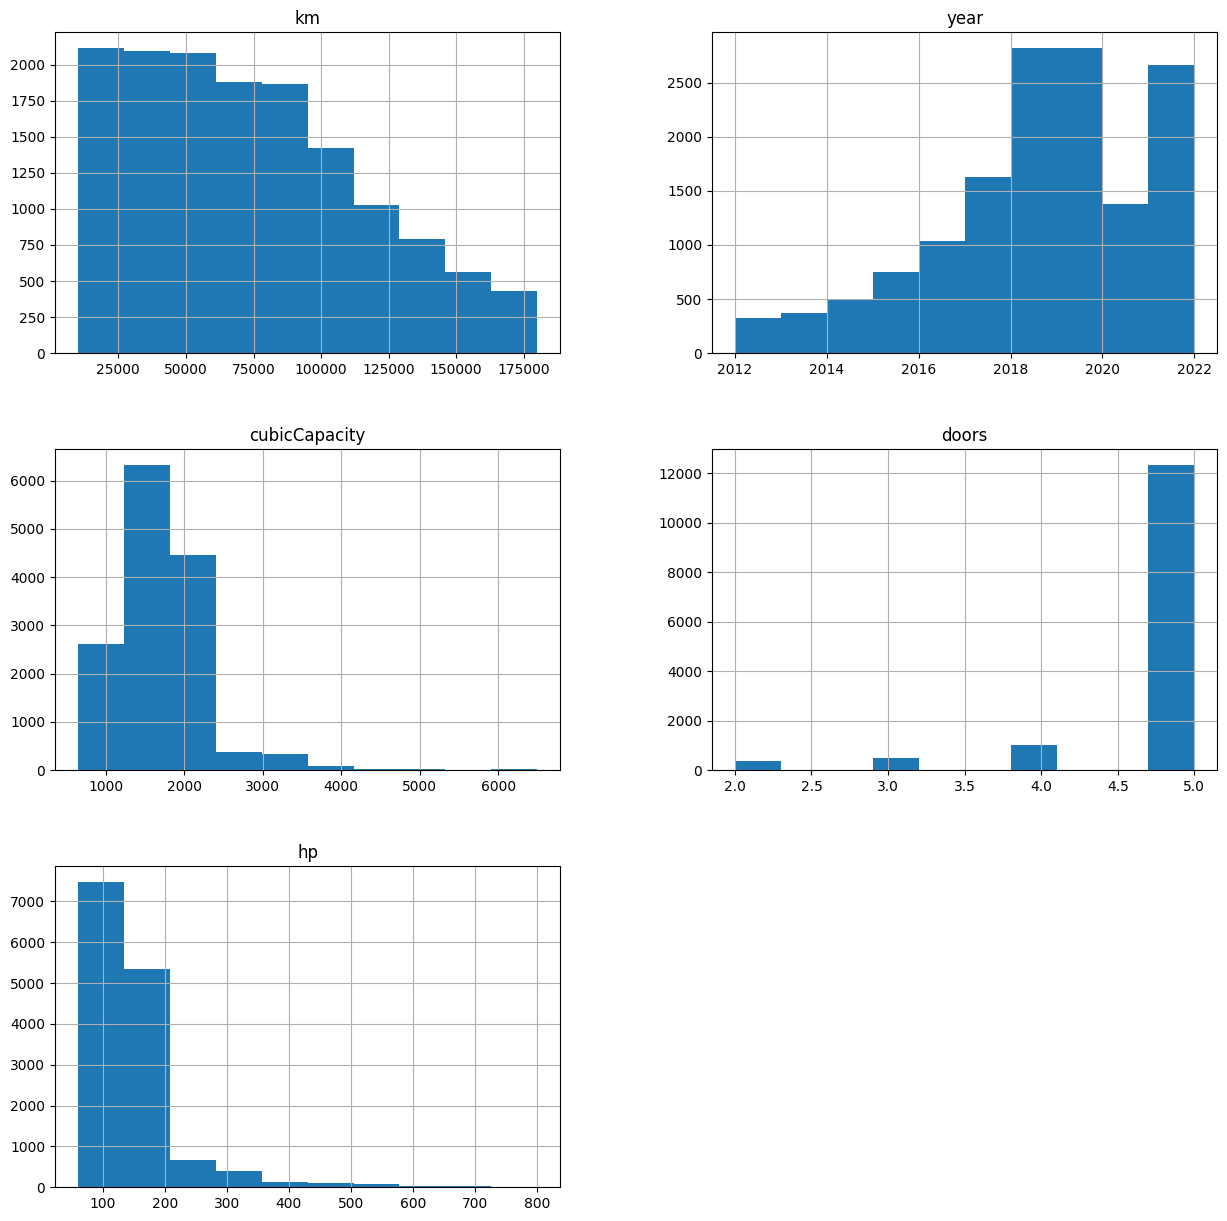

In [27]:
df[campos_numericos].hist(ax = plt.figure(figsize = (15, 15)).gca())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#474646'` for same effect.
  warnings.warn(msg, FutureWarning)


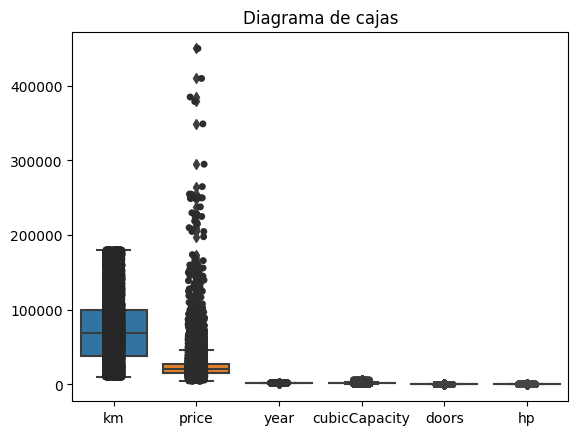

In [28]:
sns.boxplot(df)
sns.stripplot(df, color = '#474646')
plt.title('Diagrama de cajas')
plt.show()

# 5. Generar fichero json con df.

In [29]:
df.to_json('data.json', orient='table', index=True, indent=4)